<h2>Titter sentiment analysis</h2>

In [186]:
import os
import nltk
import tweepy
from dotenv import load_dotenv
import json
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from datetime import datetime
import re
import cv2

In [187]:
import ssl
def set_up_ssl():
    try:
        _create_unverified_https_context = ssl._create_unverified_context
    except AttributeError:
        pass
    else:
        ssl._create_default_https_context = _create_unverified_https_context

In [188]:
set_up_ssl()
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/dennisfenchenko/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [189]:
load_dotenv()
TWITTER_BEARER_TOKEN = os.getenv('TWITTER_BEARER_TOKEN')
TWITTER_API_KEY = os.getenv('TWITTER_API_KEY')
TWITTER_API_SECRET_KEY = os.getenv('TWITTER_API_SECRET_KEY')
TWITTER_ACCESS_TOKEN = os.getenv('TWITTER_ACCESS_TOKEN')
TWITTER_ACCESS_TOKEN_SECRET = os.getenv('TWITTER_ACCESS_TOKEN_SECRET')

In [190]:
print("Authenticating to Twitter...")

# client = tweepy.Client(bearer_token=TWITTER_BEARER_TOKEN)
client = tweepy.Client(bearer_token=TWITTER_BEARER_TOKEN)
auth = tweepy.OAuthHandler(TWITTER_API_KEY, TWITTER_API_SECRET_KEY)
auth.set_access_token(TWITTER_ACCESS_TOKEN, TWITTER_ACCESS_TOKEN_SECRET)

Authenticating to Twitter...


In [191]:
# create Twitter API client
api = tweepy.API(auth, wait_on_rate_limit=True)

In [192]:
def get_tweets_for_user(username, names, until_date, num_tweets):

    search_query = username + " OR "

    # include all possible candidate names in a query
    for name in names:
        search_query += "entity:" + '"' + name + '"' + " OR "

    # remove the last OR statement
    search_query = search_query[:-3]

    search_query += "-is:retweet"

    tweets = api.search_tweets(q = search_query, count = num_tweets,
                               until=until_date,
                               tweet_mode="extended")
    return tweets

In [193]:
print("Fetching tweets for two candidates")

TOTAL_NUM_TWEETS = 15000
NUM_TWEETS_BATCH = 100
UNTIL = "2022-10-11"

democratic_candidate_names = ["John Fetterman", "Fetterman"]
dem_cand_username = "@JohnFetterman"

republic_candidate_names = ["Dr. Oz", "Dr Oz", "Dr. Mehmet Oz",
                           "Mehmet Oz"]
rep_cand_username = "@DrOz"

democratic_tweets_list = []

republican_tweets_list = []

curr_num_democratic_tweets = 0
curr_num_republican_tweets = 0

while curr_num_democratic_tweets <= TOTAL_NUM_TWEETS:
    democratic_tweets = get_tweets_for_user(dem_cand_username,
                                            democratic_candidate_names,
                                            UNTIL, NUM_TWEETS_BATCH)

    democratic_tweets_list.extend(democratic_tweets)

    curr_num_democratic_tweets += len(democratic_tweets)

    print("Successfully retrieved ", str(len(democratic_tweets)), " for the "
                                                                  "democratic"
                                                                  " candidate" )


while curr_num_republican_tweets <= TOTAL_NUM_TWEETS:
        republican_tweets = get_tweets_for_user(rep_cand_username,
                                            republic_candidate_names,
                                            UNTIL, NUM_TWEETS_BATCH)
        republican_tweets_list.extend(republican_tweets)

        curr_num_republican_tweets += len(republican_tweets)

        print("Successfully retrieved ", str(len(republican_tweets)), " for the "
                                                              "republican"
                                                              " candidate" )

Fetching tweets for two candidates
Successfully retrieved  95  for the democratic candidate
Successfully retrieved  95  for the democratic candidate
Successfully retrieved  95  for the democratic candidate
Successfully retrieved  95  for the democratic candidate
Successfully retrieved  95  for the democratic candidate
Successfully retrieved  95  for the democratic candidate
Successfully retrieved  95  for the democratic candidate
Successfully retrieved  95  for the democratic candidate
Successfully retrieved  95  for the democratic candidate
Successfully retrieved  95  for the democratic candidate
Successfully retrieved  95  for the democratic candidate
Successfully retrieved  95  for the democratic candidate
Successfully retrieved  95  for the democratic candidate
Successfully retrieved  95  for the democratic candidate
Successfully retrieved  95  for the democratic candidate
Successfully retrieved  95  for the democratic candidate
Successfully retrieved  95  for the democratic candid

Rate limit reached. Sleeping for: 520


Successfully retrieved  95  for the democratic candidate
Successfully retrieved  95  for the democratic candidate
Successfully retrieved  95  for the democratic candidate
Successfully retrieved  95  for the democratic candidate
Successfully retrieved  95  for the democratic candidate
Successfully retrieved  95  for the democratic candidate
Successfully retrieved  95  for the democratic candidate
Successfully retrieved  95  for the democratic candidate
Successfully retrieved  95  for the democratic candidate
Successfully retrieved  95  for the democratic candidate
Successfully retrieved  95  for the democratic candidate
Successfully retrieved  95  for the democratic candidate
Successfully retrieved  95  for the democratic candidate
Successfully retrieved  95  for the democratic candidate
Successfully retrieved  95  for the democratic candidate
Successfully retrieved  95  for the democratic candidate
Successfully retrieved  95  for the democratic candidate
Successfully retrieved  95  for

Rate limit reached. Sleeping for: 833


Successfully retrieved  100  for the republican candidate
Successfully retrieved  100  for the republican candidate
Successfully retrieved  100  for the republican candidate
Successfully retrieved  100  for the republican candidate
Successfully retrieved  100  for the republican candidate
Successfully retrieved  100  for the republican candidate
Successfully retrieved  100  for the republican candidate
Successfully retrieved  100  for the republican candidate
Successfully retrieved  100  for the republican candidate
Successfully retrieved  100  for the republican candidate
Successfully retrieved  100  for the republican candidate
Successfully retrieved  100  for the republican candidate
Successfully retrieved  100  for the republican candidate
Successfully retrieved  100  for the republican candidate
Successfully retrieved  100  for the republican candidate
Successfully retrieved  100  for the republican candidate
Successfully retrieved  100  for the republican candidate
Successfully r

In [194]:
print("The numeber of tweets fetch for each candidate is: ")
print("Democratic candidate ", len(democratic_tweets_list))
print("Republican candidate ", len(republican_tweets_list))

The numeber of tweets fetch for each candidate is: 
Democratic candidate  15010
Republican candidate  15100


In [195]:
def convert_tweets_to_json(raw_tweets):
    json_tweets = []
    for tweet in raw_tweets:
        json_tweet_str = json.dumps(tweet._json)
        json_tweet = json.loads(json_tweet_str)
        json_tweets.append(json_tweet)
    return json_tweets

In [196]:
print("Converting democratic tweets to json")
democratic_json_tweets = convert_tweets_to_json(democratic_tweets)

print("Converting republican tweets to json")
republican_json_tweets = convert_tweets_to_json(republican_tweets)

Converting democratic tweets to json
Converting republican tweets to json


In [197]:
def write_json_tweets_to_file(json_tweets, TWEETS_DIR, FILE_NAME):
    tweets_file = open(TWEETS_DIR + FILE_NAME, "a")
    tweets_file_str = json.dumps(json_tweets)
    tweets_file.write(tweets_file_str)
    tweets_file.close()

In [198]:
print("Writing tweets to a file")

TWEETS_DIR = "tweets/"

DEMOCRATIC_TWEETS_FILE_NAME = "democratic_tweets.json"
REPUBLICAN_TWEETS_FILE_NAME = "republican_tweets.json"

write_json_tweets_to_file(democratic_json_tweets, TWEETS_DIR, DEMOCRATIC_TWEETS_FILE_NAME)

write_json_tweets_to_file(republican_json_tweets, TWEETS_DIR, REPUBLICAN_TWEETS_FILE_NAME)

Writing tweets to a file


In [199]:
def read_tweets_from_file(file_name):
    with open(TWEETS_DIR + file_name, "r") as tweets_file:
        tweets = json.load(tweets_file)
    return tweets

In [200]:
print("Retrieving the tweets for both candidates from file")

READ_TWEETS_FROM_FILE = False

if READ_TWEETS_FROM_FILE:
    democratic_json_tweets = read_tweets_from_file(DEMOCRATIC_TWEETS_FILE_NAME)
    republican_json_tweets = read_tweets_from_file(REPUBLICAN_TWEETS_FILE_NAME)

Retrieving the tweets for both candidates from file


In [201]:
print("Creating Vader sentiment analyzer object")

sentiment = SentimentIntensityAnalyzer()

Creating Vader sentiment analyzer object


In [202]:
#sample json file is

democratic_json_tweets[0]

{'created_at': 'Mon Oct 10 23:59:57 +0000 2022',
 'id': 1579622796699009024,
 'id_str': '1579622796699009024',
 'full_text': "RT @JohnFetterman: The supremely delicious irony is that while I've been holding massive campaign rallies across the state, Dr. Oz hasn’t h…",
 'truncated': False,
 'display_text_range': [0, 140],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [{'screen_name': 'JohnFetterman',
    'name': 'John Fetterman',
    'id': 3622368202,
    'id_str': '3622368202',
    'indices': [3, 17]}],
  'urls': []},
 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'},
 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_screen_name': None,
 'user': {'id': 1421132235143589894,
  'id_str': '1421132235143589894',
  'name': 'Toasty',
  'screen_name': 'Toasty_Takes',
 

In [203]:
print("Use this function to clean the tweet's body")

def clean_tweet(tweet_body):
    # remove @ mentions from the tweet
    text = re.sub(r'@[A-Za-z0-9]+', '', tweet_body)
    # remove the hashtags from tweets
    text = re.sub(r'#', '', text)
    text = re.sub(r'RT[\s]+', '', text)
    # remove hyperlinks
    text = re.sub(r'https?:\/\/\S+', '', text)
    return text

Use this function to clean the tweet's body


In [204]:
# this function return a list containing the following triplets: [(date,
# tweet_neutral_score, tweet_negative_score)]

print("The tweet's neutrality and negativity could be  scaled by the "
      "number "
      "of retweets the tweet has received.")

def get_tweet_sentiment_score(tweets, scale_by_num_retweets=False):
    sentiments = []
    for tweet in tweets:
        timestamp = tweet["created_at"]
        datetime_timestamp = datetime.strftime(datetime.strptime(timestamp,'%a %b %d '
                                                                   '%H:%M:%S +0000 %Y'), '%Y-%m-%d')
        tweet_body = clean_tweet(tweet["full_text"])
        retweet_count = tweet["retweet_count"]
        tweet_sentiment = sentiment.polarity_scores(tweet_body)
        if scale_by_num_retweets:
            tweet_neg_score = tweet_sentiment['neg'] * retweet_count
            tweet_neu_score = tweet_sentiment['neu'] * retweet_count
        else:
            tweet_neg_score = tweet_sentiment['neg']
            tweet_neu_score = tweet_sentiment['neu']

        sentiments.append((datetime_timestamp, tweet_neu_score,
                           tweet_neg_score))
    return sentiments

The tweet's neutrality and negativity could be  scaled by the number of retweets the tweet has received.


In [205]:
print("Getting sentiment scores for each candidate")

democratic_sentiments = get_tweet_sentiment_score(democratic_json_tweets)

republican_sentiments = get_tweet_sentiment_score(republican_json_tweets)

Getting sentiment scores for each candidate


In [206]:
print("Analysis for democratic candidate yields:")
print(democratic_sentiments[:10])

Analysis for democratic candidate yields:
[('2022-10-10', 0.677, 0.045), ('2022-10-10', 0.761, 0.112), ('2022-10-10', 0.752, 0.075), ('2022-10-10', 0.8, 0.2), ('2022-10-10', 0.823, 0.0), ('2022-10-10', 0.823, 0.0), ('2022-10-10', 1.0, 0.0), ('2022-10-10', 1.0, 0.0), ('2022-10-10', 1.0, 0.0), ('2022-10-10', 0.761, 0.112)]


In [207]:
print("Analysis for republican candidate yields:")
print(republican_sentiments[:10])

Analysis for republican candidate yields:
[('2022-10-10', 0.854, 0.0), ('2022-10-10', 0.829, 0.0), ('2022-10-10', 0.545, 0.455), ('2022-10-10', 1.0, 0.0), ('2022-10-10', 0.0, 0.0), ('2022-10-10', 0.81, 0.19), ('2022-10-10', 0.623, 0.21), ('2022-10-10', 0.583, 0.19), ('2022-10-10', 1.0, 0.0), ('2022-10-10', 0.797, 0.0)]


In [208]:
def get_date_score_mapping(candidate_sentiments):
    candidate_total_sentiment = {}
    DATE_IDX = 0
    NEUTRAL_SCORE_IDX = 1
    NEGATIVE_SCORE_IDX = 2

    for sent in candidate_sentiments:
        date = sent[DATE_IDX]
        if date in candidate_total_sentiment.keys():
            curr_neutral_score = \
                candidate_total_sentiment[date][0]
            curr_negative_score = candidate_total_sentiment[date][1]
            curr_neutral_score += sent[NEUTRAL_SCORE_IDX]
            curr_negative_score += sent[NEGATIVE_SCORE_IDX]
            candidate_total_sentiment[date] = (curr_neutral_score, curr_negative_score)
        else:
            candidate_total_sentiment[date] = (sent[NEUTRAL_SCORE_IDX], sent[NEGATIVE_SCORE_IDX])

    return candidate_total_sentiment

In [209]:
print("Creating date-sentiment map for each candidate: ")

democratic_total_sentiment = get_date_score_mapping(democratic_sentiments)

republican_total_sentiment = get_date_score_mapping(republican_sentiments)

Creating date-sentiment map for each candidate: 


In [210]:
print("The sentiment map for democratic candidate is: ")

print(democratic_total_sentiment)

The sentiment map for democratic candidate is: 
{'2022-10-10': (77.65899999999999, 5.8709999999999996)}


In [211]:
print("The sentiment map for republican candidate is: ")

print(republican_total_sentiment)

The sentiment map for republican candidate is: 
{'2022-10-10': (72.201, 14.346)}


In [212]:
democratic_dates = list(democratic_total_sentiment.keys())
democratic_sent = list(democratic_total_sentiment.values())

democratic_neu_sent = [x[0] for x in democratic_sent]
democratic_neg_sent = [x[1] for x in democratic_sent]


republican_dates = list(republican_total_sentiment.keys())
republican_sent = list(republican_total_sentiment.values())

republican_neu_sent = [x[0] for x in republican_sent]
republican_neg_sent = [x[1] for x in republican_sent]

Plotting the data for the democratic candidate: 


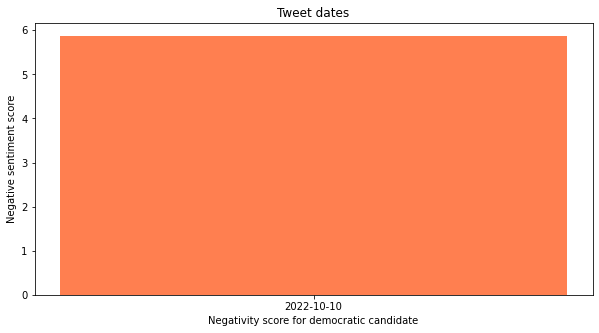

In [213]:
print("Plotting the data for the democratic candidate: ")

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(democratic_dates, democratic_neg_sent, color ='coral',
        width = 0.4)

plt.xlabel("Negativity score for democratic candidate")
plt.ylabel("Negative sentiment score")
plt.title("Tweet dates")
plt.show()

Plotting neutrality score for the democratic candidate


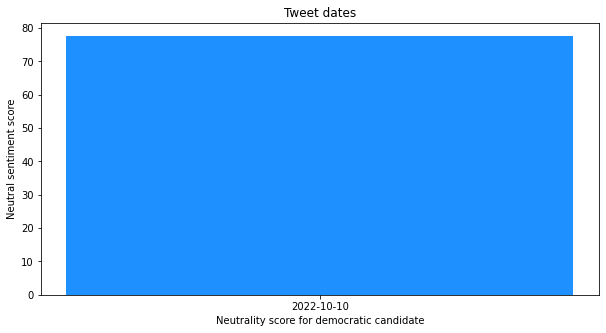

In [214]:
print("Plotting neutrality score for the democratic candidate")

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(democratic_dates, democratic_neu_sent, color ='dodgerblue',
        width = 0.4)

plt.xlabel("Neutrality score for democratic candidate")
plt.ylabel("Neutral sentiment score")
plt.title("Tweet dates")
plt.show()

Plotting the data for the republican candidate: 


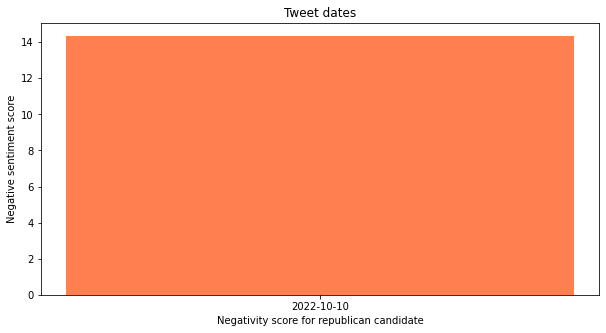

In [215]:
print("Plotting the data for the republican candidate: ")

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(republican_dates, republican_neg_sent, color ='coral',
        width = 0.4)

plt.xlabel("Negativity score for republican candidate")
plt.ylabel("Negative sentiment score")
plt.title("Tweet dates")
plt.show()

Plotting neutrality score for the republican candidate


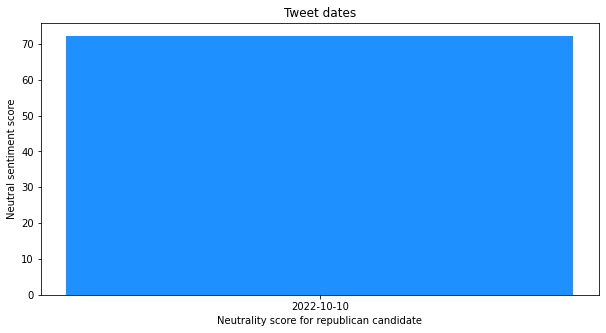

In [216]:
print("Plotting neutrality score for the republican candidate")

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(democratic_dates, republican_neu_sent, color ='dodgerblue',
        width = 0.4)

plt.xlabel("Neutrality score for republican candidate")
plt.ylabel("Neutral sentiment score")
plt.title("Tweet dates")
plt.show()

In [217]:
print("Plotting Word Clouds for each candidate:")

print("Generating a word cloud for the democratic candidate:")

all_democrat_candidates_tokens = ' '.join(token["full_text"] for token in
                                          democratic_json_tweets)

all_republican_candidates_tokens = ' '.join(token["full_text"] for token in
                                          republican_json_tweets)

# clean the tweets

all_democrat_candidates_tokens = clean_tweet(all_democrat_candidates_tokens)
all_republican_candidates_tokens = clean_tweet(all_republican_candidates_tokens)

dem_word_cloud = WordCloud(random_state=21,
                           max_font_size=119).generate(all_democrat_candidates_tokens)

rep_word_cloud = WordCloud(width = 500, height = 300, random_state=21,
                           max_font_size=119).generate(all_republican_candidates_tokens)

Plotting Word Clouds for each candidate:
Generating a word cloud for the democratic candidate:


Visualizing word cloud for the democrat


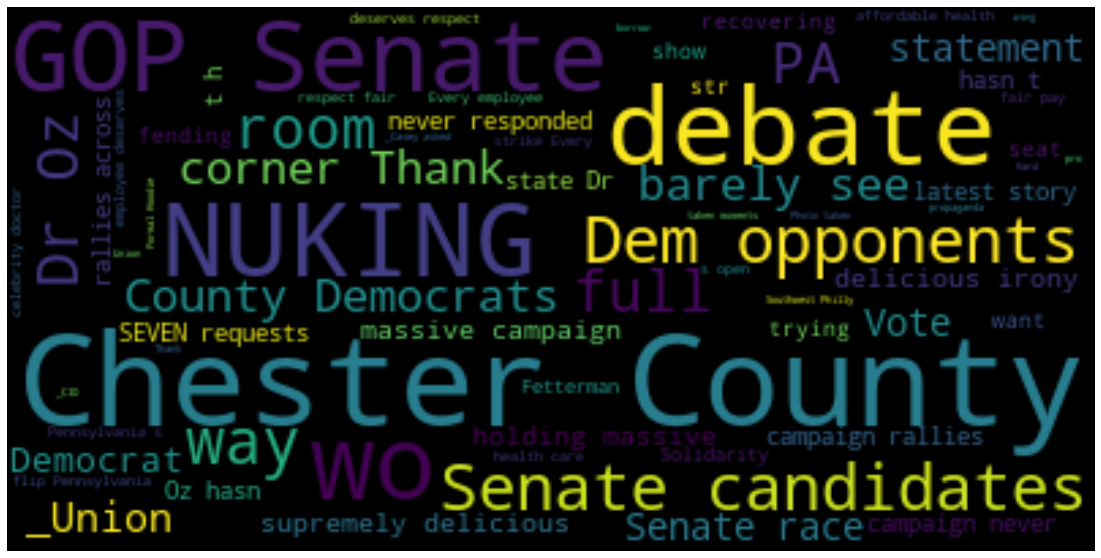

In [218]:
print("Visualizing word cloud for the democrat")

plt.figure(figsize=(20,10))
plt.imshow(dem_word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Visualizing word cloud for the republican candidate


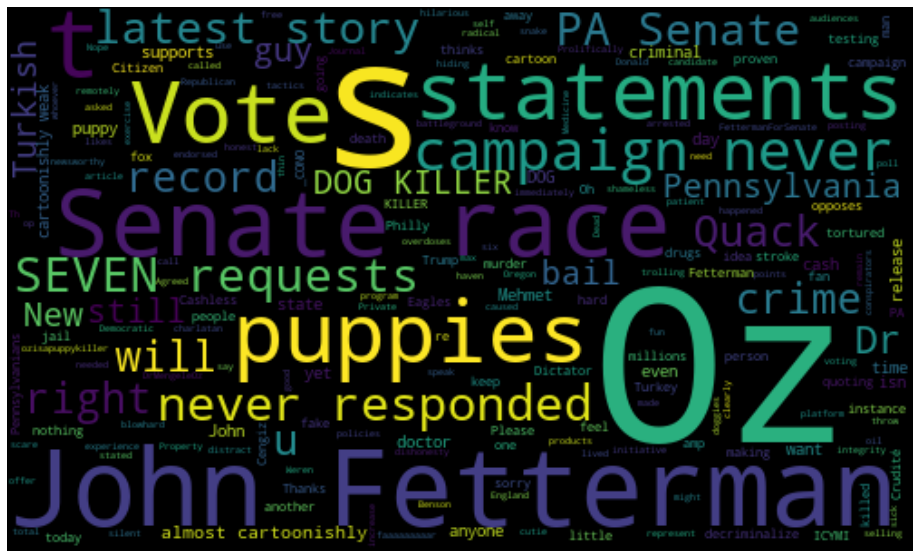

In [219]:
print("Visualizing word cloud for the republican candidate")

plt.figure(figsize=(20,10))
plt.imshow(rep_word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

The current polls show the following for the period of October 8 to October 11:
The polls are taken from the following website:  https://projects.fivethirtyeight.com/polls/senate/2022/pennsylvania/


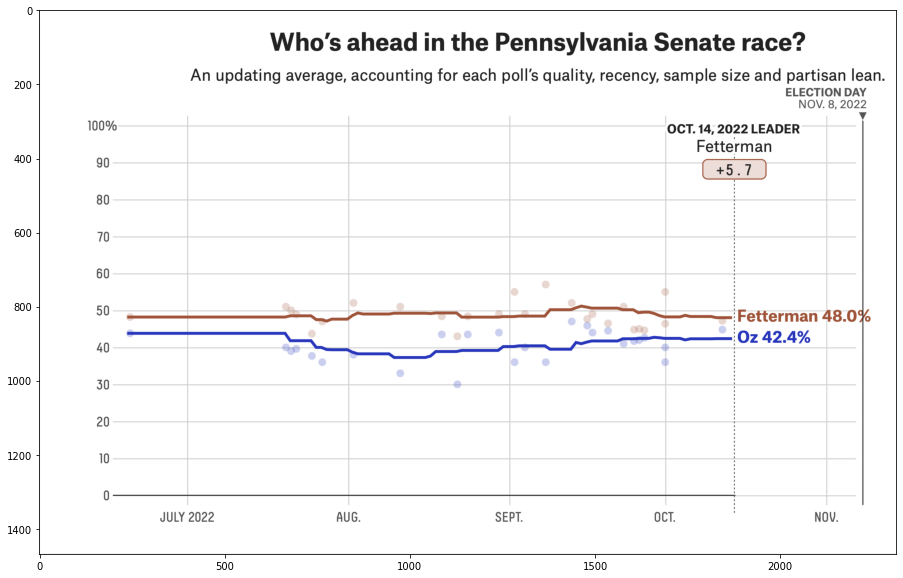

In [220]:
print("The current polls show the following for the period of October 8 to "
      "October 11:")

POLLS_URL = "https://projects.fivethirtyeight.com/polls/senate/2022/pennsylvania/"

print("The polls are taken from the following website: ", POLLS_URL)

polls_latest = cv2.imread("polls_latest.png", cv2.IMREAD_UNCHANGED)
plt.figure(figsize=(20,10))
plt.imshow(polls_latest)
plt.show()

<h2>Analysis of the results above<h2>

In this study we've analyzed ~ 15 000 tweets for each candidate. Namely,
Democratic Candidate John Fetterman and Republican Candidate Dr. Oz. From
Twitter analysis, we can conclude that the Democratic candidate is more
likely to win the race, which is in accordance with the most recent polls.

The tweets were fetched for the same dates as the polls were conducted. (Oct
8 to Oct 11). The tweets are from October 10. This range can be expanded for
several dates by increasing the TOTAL_NUM_TWEETS variable beyond 15 000.

Namely, our results are as follows:

From sentiment analysis we can observe that tweets about the Republican
candidate Dr. Oz (Negativity Score: 14) are much more negative than those that
are about the Democratic candidate. (Negativity Score: 6). The Neutrality
score for both candidates are about the same (~ 70).

Another interesting conclusion can be derived from the Word Clouds above.

For John Fetterman the word cloud shows words such as "recovering"
being some of the most frequently used. This refers to Fetterman having had a
 stroke back in May, which is frequently used against him.

For Mehmet Oz, we can see interesting words such as "puppies", "dog killer",
 and "fraud". The first two words refer to the research he's done in the past
which allegedly led to the killing of 300 puppies. And the third one refers
 to him advertising dubious treatments on a TV commercial. Both stories are
 frequently used against him by the opponents.